# The Fasion MNIST dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.13.1'

# Load the fasion MNIST dataset

In [5]:
mnist = tf.keras.datasets.fashion_mnist

## Create test and train data

In [6]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Let's take a look at the data

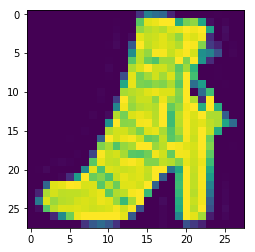

In [7]:
plt.imshow(training_images[11])

In [8]:
training_images[11]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  39, 111,  93,  85,  27,   0,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0, 190, 244, 248, 255, 255, 155, 202, 212, 150,   9,   0,   3,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0, 213, 227, 233, 227, 243, 246, 255, 250, 255, 146,   0,   9,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
          6, 244, 233, 236, 244, 232, 214, 248, 242, 251,  33,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   6,   0,
         72, 255, 231, 239, 244, 237, 226, 255, 252, 207,  44,  24,   0,
          2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        125, 231, 215, 253, 252, 234, 246, 254, 239, 128, 114,  63,   0,
          3,   0],
       [  

In [9]:
training_labels[11]

9

## Normalizing

Notice that in the array above, the values lie between 0 to 255. For training a neural network, for various reasons it is better if all the values lie between 0 and 1. This can be done using a process called Normalization. Let's do this.

In [10]:
training_images = training_images / 255
test_images = test_images / 255

# A new type of network

Until now, we've used the simplest of the networks. A one neuron network. Time has come to try something more adventurous.

`Sequential`: This defines the sequence of layers in the neural network

`Flatten` : Converts a two dimensional array of data points into a one dimensional set

`Dense` : A layer of neurons having several nodes

Each neuron needs an activation function. the `relu` is one of the most widely used functions. It is defined as -

    function relu():
        if x >= 0:
            return x
        else:
            return 0
what this essentially does is, it only passes 0 or more values to the next layer in the network.

`softmax`: This function is typically used for multiclass classification problems. What it basically does, is that it receives a set of values and outputs 1 for the highest value in the array.

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Compile the model

Now that we've defined the model, it's time to compile it. We do this like before, by supplying the optimizer and loss function. The next step is to train the model using the training data we defined above. 

In [12]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/15
60000/60000 [==============================] - 11s 176us/sample - loss: 0.4970 - acc: 0.8270
Epoch 2/15
60000/60000 [==============================] - 10s 169us/sample - loss: 0.3754 - acc: 0.8650
Epoch 3/15
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3350 - acc: 0.8766
Epoch 4/15
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3115 - acc: 0.8859
Epoch 5/15
60000/60000 [==============================] - 9s 158us/sample - loss: 0.2937 - acc: 0.8914
Epoch 6/15
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2789 - acc: 0.8964
Epoch 7/15
60000/60000 [==============================] - 10s 158us/sample - loss: 0.2668 - acc: 0.9002
Epoch 8/15
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2560 - acc: 0.9053
Epoch 9/15
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2479 - acc: 0.90

# Test the performance of the model

In [13]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3979 - acc: 0.8660


[0.3979239483833313, 0.866]

# Understanding the output

There are 10k data points in our test dataset, as can be seen in the output of the cell below.

In [29]:
test_images.shape

(10000, 28, 28)

In [36]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

the predict method returns an array of of size 10k x 10. There are 10 different classes to choose from.

In [39]:
classifications = model.predict(test_images)

The classifications array contains probability that an image belongs to each of the classes, respectively. Thus the class which will have the highest probability will be chosen as the predicted class.  

In [42]:
classifications.shape

(10000, 10)

In [40]:
classifications[1]

array([5.5339220e-05, 3.7541023e-17, 9.9703372e-01, 1.8600655e-12,
       4.2544300e-04, 1.5192966e-09, 2.4855293e-03, 2.3324862e-18,
       5.8822192e-10, 7.0322600e-13], dtype=float32)

The maximum probability of classification for the second data point (index 1) is `0.9970` of class 2. 

In [49]:
max(classifications[1]), np.where(
    classifications[1] == max(classifications[1]))

(0.9970337, (array([2]),))

Let's see what the actual class of this image is. It is 2...so we can conclude that our neural network made the correct prediction.

In [50]:
print(test_labels[1])

2


# Trying another model

Let's create a different model and play with it. Can we increase our accuracy? let's see...

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 32s 538us/sample - loss: 0.4713 - acc: 0.8311
Epoch 2/5
60000/60000 [==============================] - 32s 528us/sample - loss: 0.3580 - acc: 0.8677
Epoch 3/5
60000/60000 [==============================] - 31s 523us/sample - loss: 0.3192 - acc: 0.8822
Epoch 4/5
60000/60000 [==============================] - 31s 523us/sample - loss: 0.2972 - acc: 0.8896
Epoch 5/5
60000/60000 [==============================] - 32s 527us/sample - loss: 0.2774 - acc: 0.8966


In [54]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 160us/sample - loss: 0.3499 - acc: 0.8761


[0.3498943436026573, 0.8761]

In [56]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[1.6852969e-06 8.4251059e-09 4.0851567e-09 2.9693076e-10 4.7224313e-10
 9.1694100e-03 7.0497215e-08 2.7743510e-03 4.3116013e-09 9.8805445e-01]
9
